In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import time
def format_time(seconds):
    return "{:.10f}".format(seconds)

Execution time: 0.1943807601928711 seconds
Minimalno bojenje grafa: {'A': 1, 'B': 3, 'C': 2, 'D': 1}
Broj korišćenih boja: 3


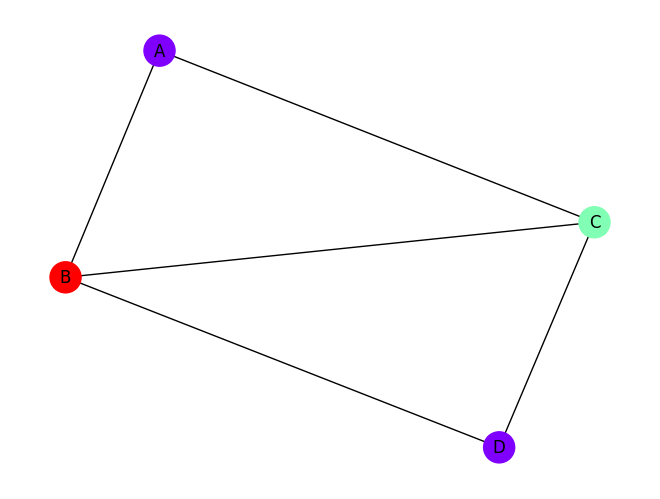

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, graph):
        self.graph = graph
        self.max_degree = max(d for _,d in G.degree())
        self.colors = self.initial_coloring()
        self.fitness = self.calc_fitness()

    # def is_feasible(self):
    #     for node in self.graph:
    #         for neighbor in self.graph[node]:
    #             if self.colors[node] == self.colors[neighbor]:
    #                 return False
    #     return True
        
        
    def initial_coloring(self):
        colors = {}
        # available_colors = set()
        # for node in self.graph:
        #     neighbor_colors = {colors[neighbor] for neighbor in self.graph[node] if neighbor in colors}
        #     color = 1
        #     while color in neighbor_colors:
        #         color += 1
        #     colors[node] = color
        #     available_colors.add(color)
       
        for node in self.graph:
            color = random.randint(1,self.max_degree + 1)
            colors[node] = color 
        return colors

    def calc_fitness(self):
        conflicts = 0 
        num_colors = max(self.colors.values())
        
        for node in self.graph:
            for neighbor in self.graph[node]:
                if self.colors[node] == self.colors[neighbor]:
                    conflicts += 1
    
        fitness = conflicts + (num_colors / self.max_degree) 
        return fitness

def is_feasible(individual):
        for node in individual.graph:
            for neighbor in individual.graph[node]:
                if individual.colors[node] == individual.colors[neighbor]:
                    return False
        return True

def crossover(parent1, parent2):
    child_colors = {}
    for node in parent1.colors:
        child_colors[node] = parent1.colors[node] if random.random() < 0.5 else parent2.colors[node]
    child = Individual(parent1.graph)
    child.colors = child_colors
    child.fitness = child.calc_fitness()
    return child

def mutation(individual):
    node = random.choice(list(individual.colors.keys()))
    neighbor_colors = {individual.colors[neighbor] for neighbor in individual.graph[node]}
    available_colors = set(range(1, len(individual.graph) + 1)) - neighbor_colors
    if available_colors:
        individual.colors[node] = random.choice(list(available_colors))
        individual.fitness = individual.calc_fitness()

def ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = [Individual(graph) for _ in range(population_size)]
    
    for _ in range(num_generations):
        population.sort(key=lambda x: x.fitness)
        # print(population[0].fitness)
        elites = population[:elitism_size]
        offspring = []
        
        for _ in range(population_size - elitism_size):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            if random.random() < mutation_prob:
                mutation(child)
            offspring.append(child)
        
        population = elites + offspring
    
    best_solution = min(population, key=lambda x: x.fitness)
    if is_feasible(best_solution):
        return best_solution, True
    else:
        return best_solution, False

def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda x: x.fitness)

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}
population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

G = nx.Graph(graph)
start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)  # Pozicije čvorova
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()
else:
    print("Resenje nije nadjeno")

podaci=[]
podaci.append("small1.txt")
podaci.append("Broj boja: "+str(len(set(best_solution.colors.values()))))
podaci.append("Vreme: "+str(format_time(end_time - start_time))+" sekundi")

with open("../Rezultati/genetic_algorithm.txt", "w") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")
podaci.clear()

In [4]:
def appendToFile(filename,num_colors_used,elapsed_time):
    podaci.append(filename+".txt")
    podaci.append("Broj boja: "+str(num_colors_used))
    podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

    
    with open("../Rezultati/genetic_algorithm.txt", "a") as fajl:
        for podatak in podaci:
                fajl.write(f"{podatak}\n")

    podaci.clear()

Minimalno bojenje grafa: {0: 8, 1: 1, 2: 7, 3: 7, 4: 2, 5: 12, 6: 1, 7: 1, 8: 1, 9: 9, 10: 11, 11: 7, 12: 6, 13: 11, 14: 8, 15: 5, 16: 10, 17: 2, 18: 11, 19: 11, 20: 12, 21: 12, 22: 10, 23: 2, 24: 12, 25: 7, 26: 10, 27: 8, 28: 9, 29: 5}
Broj korišćenih boja: 10


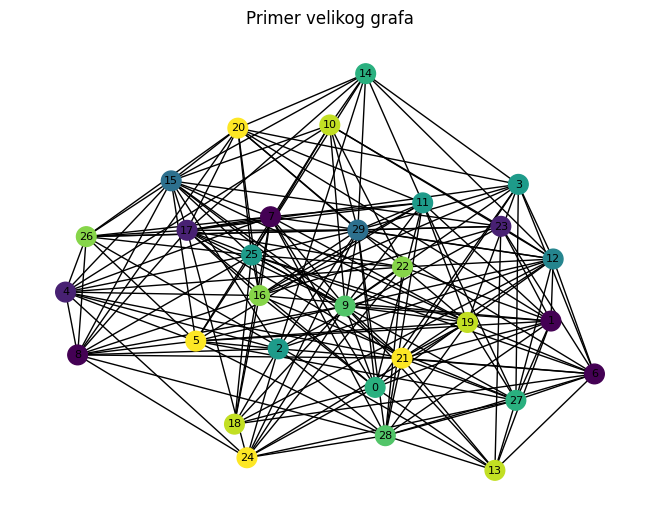

In [5]:
G = nx.erdos_renyi_graph(30,0.5)


population_size = 1000
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
else:
    print("Resenje nije nadjeno")

G = nx.Graph(G)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer velikog grafa")
plt.show()

In [6]:
G = nx.erdos_renyi_graph(550,0.5)

In [7]:
population_size = 30
num_generations = 30
tournament_size = 5
elitism_size = 5
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    # print("Broj korišćenih boja:", len(set(best_solution.colors.values())))




Resenje nije nadjeno


Execution time: 1.288285493850708 seconds
Minimalno bojenje grafa: {0: 27, 1: 1, 2: 21, 3: 30, 4: 29, 5: 28, 6: 22, 7: 14, 8: 17, 9: 4, 10: 24, 11: 18, 12: 12, 13: 20, 14: 7, 15: 13, 16: 10, 17: 8, 18: 16, 19: 11, 20: 26, 21: 19, 22: 2, 23: 9, 24: 25, 25: 6, 26: 3, 27: 23, 28: 5, 29: 15}
Broj korišćenih boja: 30


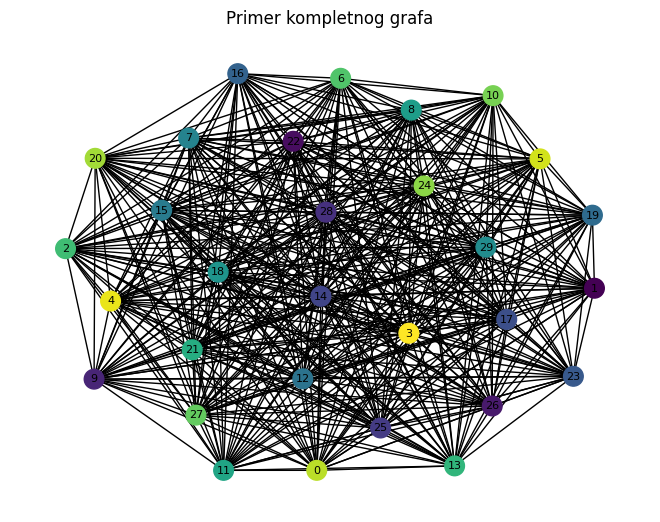

In [8]:
G = nx.complete_graph(30)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer kompletnog grafa")
    plt.show()
    appendToFile("kompletan.txt", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("kompletan", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    # print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.17922687530517578 seconds
Minimalno bojenje grafa: {'A': 4, 'B': 5, 'C': 3, 'D': 2, 'E': 3, 'F': 1, 'G': 2, 'H': 5, 'I': 3, 'J': 5}
Broj korišćenih boja: 5


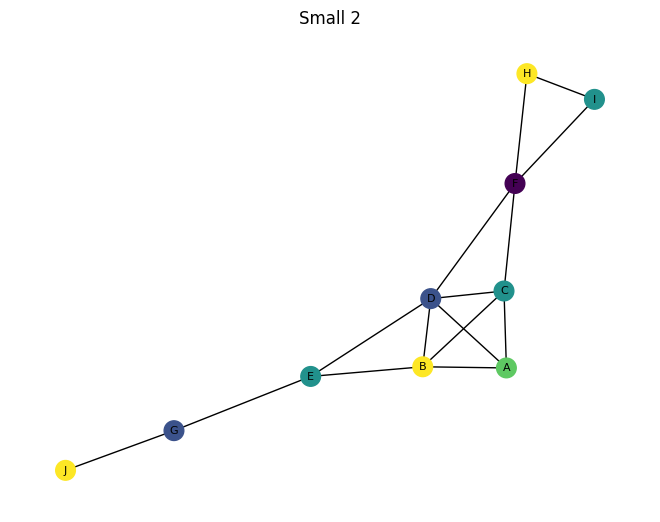

In [9]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}


start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 2")
    plt.show()
    appendToFile("small_2", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_2", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.3236112594604492 seconds
Minimalno bojenje grafa: {'A': 2, 'B': 4, 'C': 1, 'D': 3, 'E': 4}
Broj korišćenih boja: 4


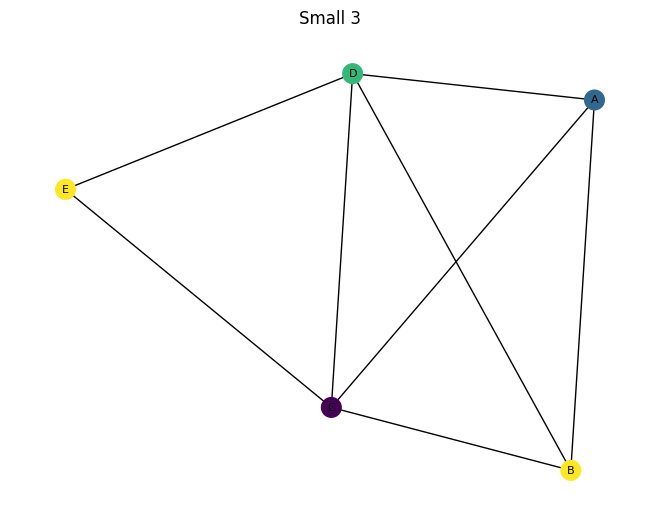

In [10]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'B', 'C', 'E'],
    'E': ['C', 'D']
}

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 3")
    plt.show()
    appendToFile("small_3", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_3", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.1608726978302002 seconds
Minimalno bojenje grafa: {'A': 1, 'B': 3, 'C': 2, 'D': 2, 'E': 1}
Broj korišćenih boja: 3


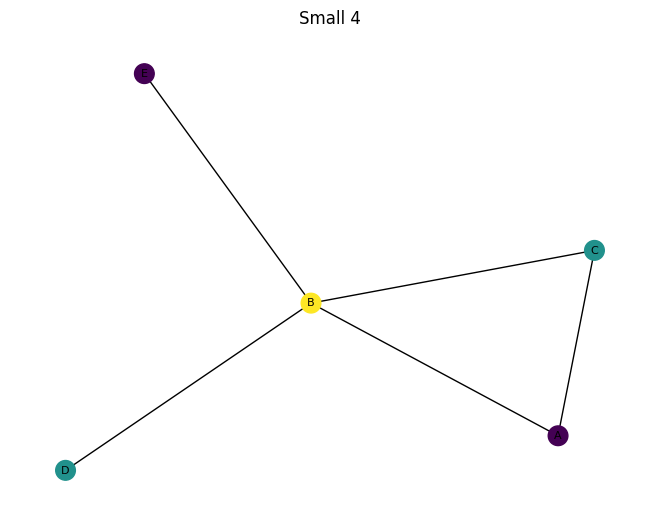

In [11]:
#small 4
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['A', 'B'],
    'D' : ['B'],
    'E' : ['B']
}
start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 4")
    plt.show()
    appendToFile("small_4", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_4", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.15416717529296875 seconds
Minimalno bojenje grafa: {'A': 1, 'B': 2, 'C': 3, 'D': 3, 'E': 1, 'F': 2, 'G': 1}
Broj korišćenih boja: 3


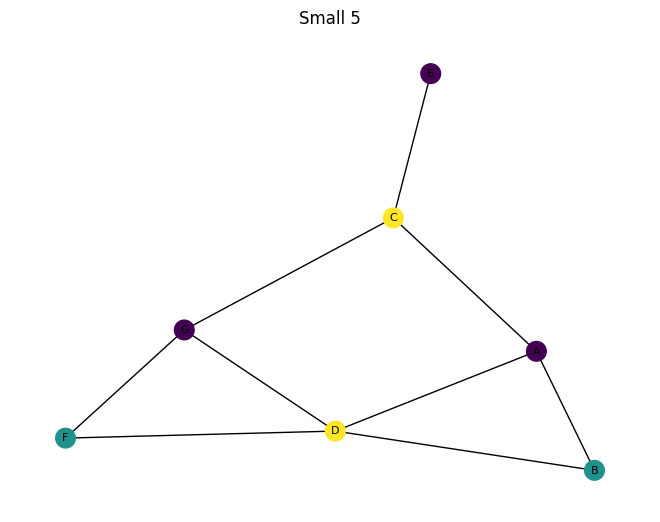

In [12]:
#small 5
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D'],
    'C': ['A', 'E', 'G'],
    'D': ['A', 'B', 'F', 'G'],
    'E': ['C'],
    'F': ['D', 'G'],
    'G': ['C', 'D', 'F']
}

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 5")
    plt.show()
    appendToFile("small_5", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_5", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.2881791591644287 seconds
Minimalno bojenje grafa: {'A': 6, 'B': 2, 'C': 4, 'D': 3, 'E': 1, 'F': 5}
Broj korišćenih boja: 6


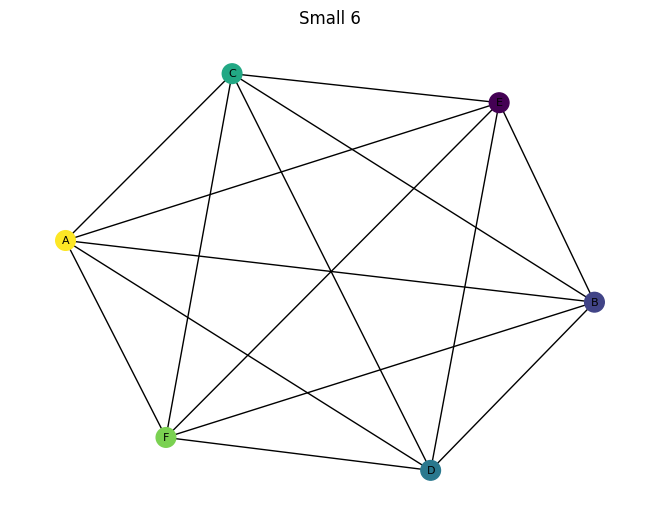

In [13]:
#small 6
graph = {
    'A': ['B', 'F', 'D', 'E'],
    'B': ['A', 'C', 'E', 'F'],
    'C': ['B', 'D', 'F', 'A'],
    'D': ['C', 'E', 'A', 'B'],
    'E': ['D', 'F', 'B', 'C'],
    'F': ['E', 'A', 'C', 'D']
}

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 6")
    plt.show()
    appendToFile("small_6", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_6", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

In [14]:
def read_dimacs(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node1, node2 = line.strip().split()
                node1, node2 = int(node1), int(node2)
                G.add_edge(node1, node2)
    return G

Execution time: 10.840603113174438 seconds
Minimalno bojenje grafa: {1: 107, 2: 38, 3: 75, 4: 105, 5: 116, 6: 32, 7: 56, 8: 78, 9: 40, 10: 4, 11: 74, 12: 73, 13: 125, 14: 53, 15: 126, 16: 26, 33: 35, 36: 44, 41: 129, 43: 64, 45: 46, 47: 92, 48: 80, 51: 16, 54: 13, 56: 92, 57: 2, 59: 22, 60: 94, 61: 62, 70: 120, 71: 115, 72: 27, 73: 35, 74: 100, 75: 49, 76: 28, 77: 65, 78: 121, 80: 3, 82: 1, 85: 8, 87: 19, 89: 31, 90: 102, 91: 42, 95: 61, 97: 61, 102: 109, 103: 22, 104: 128, 105: 55, 106: 41, 113: 102, 116: 88, 117: 17, 118: 31, 120: 91, 121: 60, 122: 134, 123: 41, 124: 98, 125: 17, 126: 103, 127: 66, 128: 86, 129: 131, 130: 114, 131: 99, 132: 120, 133: 132, 134: 33, 135: 112, 141: 99, 142: 27, 143: 6, 144: 85, 147: 84, 148: 113, 149: 62, 151: 1, 157: 51, 158: 49, 159: 43, 160: 113, 161: 113, 162: 110, 163: 106, 165: 2, 167: 134, 168: 112, 169: 128, 170: 131, 171: 57, 172: 114, 173: 17, 174: 61, 175: 68, 176: 36, 177: 94, 178: 68, 179: 76, 180: 96, 181: 20, 185: 24, 186: 43, 187: 108, 1

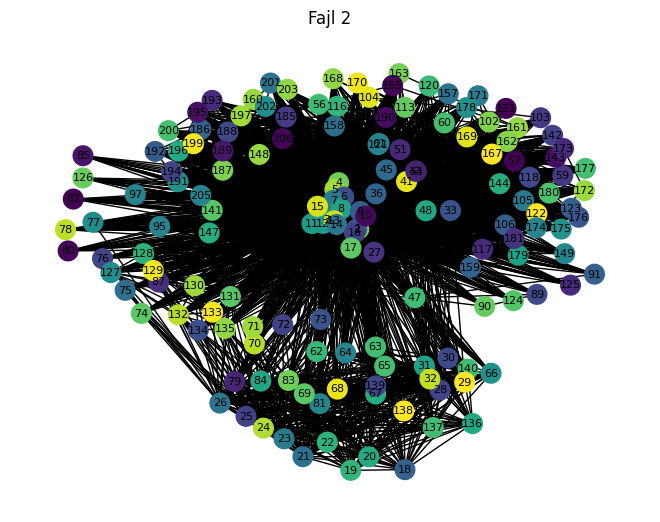

In [15]:
filename = '../File/fajl2.txt'

G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Fajl 2")
    plt.show()
    appendToFile("fajl2", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("fajl2", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 6.46865701675415 seconds
Minimalno bojenje grafa: {1: 54, 2: 52, 4: 73, 7: 2, 9: 61, 13: 72, 15: 33, 18: 30, 20: 33, 25: 60, 27: 46, 30: 1, 32: 4, 36: 9, 38: 67, 41: 34, 43: 92, 49: 36, 51: 63, 54: 17, 56: 5, 60: 13, 62: 83, 65: 72, 67: 79, 72: 49, 74: 71, 77: 11, 79: 64, 83: 5, 85: 15, 88: 11, 90: 30, 97: 60, 99: 11, 102: 93, 104: 18, 108: 17, 110: 23, 113: 3, 115: 38, 120: 83, 122: 35, 125: 9, 127: 83, 131: 57, 133: 69, 136: 28, 138: 96, 144: 55, 146: 86, 149: 22, 151: 78, 155: 39, 157: 88, 160: 88, 162: 49, 167: 59, 169: 4, 172: 80, 174: 17, 178: 16, 180: 55, 183: 34, 185: 33, 3: 35, 6: 18, 8: 20, 12: 13, 14: 31, 17: 48, 19: 46, 24: 19, 26: 50, 29: 67, 31: 76, 35: 81, 37: 89, 40: 96, 42: 87, 48: 80, 50: 71, 53: 88, 55: 95, 59: 49, 61: 3, 64: 96, 66: 48, 71: 14, 73: 1, 76: 95, 78: 15, 82: 14, 84: 25, 87: 5, 89: 69, 96: 84, 98: 6, 101: 94, 103: 38, 107: 30, 109: 89, 112: 28, 114: 63, 119: 44, 121: 73, 124: 15, 126: 11, 130: 30, 132: 73, 135: 17, 137: 17, 143: 95, 145: 

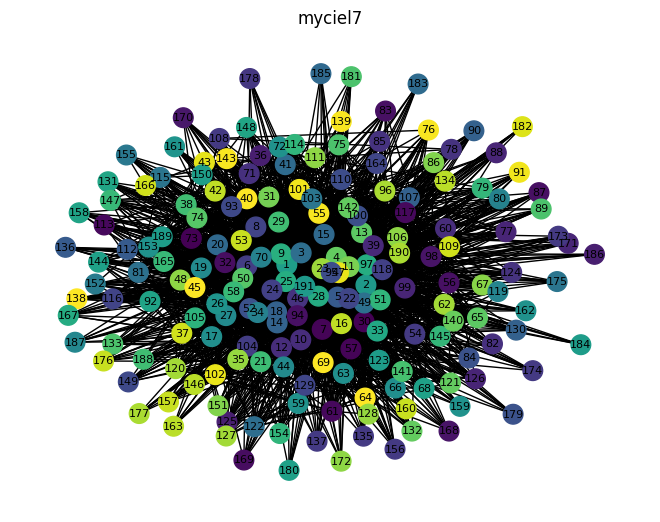

In [16]:
filename = '../File/myciel7.txt'

G = read_dimacs(filename)



start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("myciel7")
    plt.show()
    appendToFile("myciel7", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("myciel7", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 2.9595587253570557 seconds
Minimalno bojenje grafa: {1: 2, 16: 13, 20: 12, 94: 8, 80: 7, 57: 11, 62: 5, 89: 10, 113: 4, 5: 12, 21: 6, 15: 6, 2: 7, 24: 1, 30: 30, 77: 11, 92: 12, 41: 3, 55: 10, 6: 4, 54: 5, 3: 14, 100: 8, 44: 2, 105: 6, 91: 10, 42: 11, 103: 1, 90: 8, 22: 3, 67: 5, 31: 6, 115: 12, 71: 7, 4: 13, 38: 6, 85: 7, 49: 3, 50: 1, 61: 6, 63: 8, 99: 4, 96: 12, 84: 5, 107: 9, 12: 10, 56: 1, 26: 6, 72: 14, 32: 13, 76: 8, 34: 10, 53: 4, 11: 13, 87: 6, 13: 12, 14: 8, 60: 14, 7: 5, 66: 10, 83: 1, 118: 25, 48: 4, 10: 2, 120: 11, 25: 10, 75: 13, 64: 10, 28: 8, 51: 19, 8: 9, 73: 5, 18: 14, 86: 2, 104: 12, 98: 6, 46: 4, 9: 2, 33: 3, 69: 14, 58: 9, 116: 5, 17: 7, 70: 1, 101: 10, 119: 12, 35: 12, 36: 9, 117: 4, 19: 3, 43: 11, 102: 9, 23: 8, 88: 13, 97: 6, 68: 4, 29: 6, 95: 13, 52: 9, 65: 5, 59: 1, 108: 14, 39: 13, 37: 7, 112: 12, 47: 3, 27: 7, 79: 4, 93: 9, 114: 14, 74: 9, 109: 13, 106: 14, 110: 2, 78: 10, 111: 13, 81: 5, 40: 7, 82: 28, 45: 6}
Broj korišćenih boja: 18


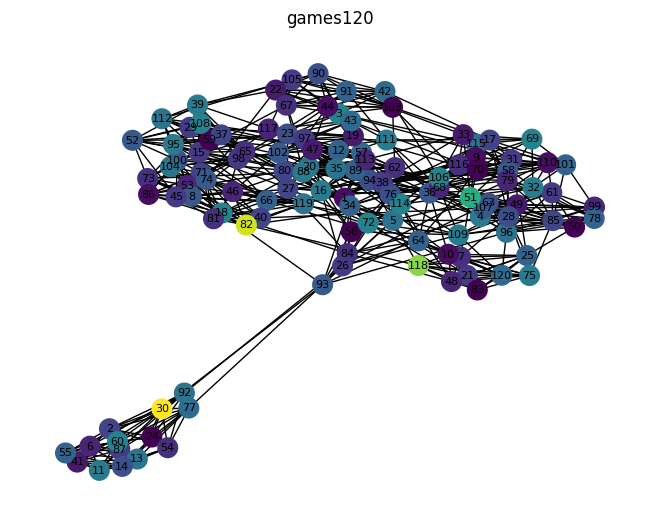

In [17]:
filename = ('../File/games120.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("games120")
    plt.show()
    appendToFile("games120", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("games120", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 29.392947673797607 seconds
Minimalno bojenje grafa: {2: 124, 1: 93, 3: 22, 5: 127, 4: 45, 6: 101, 7: 99, 8: 2, 9: 63, 10: 136, 11: 9, 12: 79, 13: 56, 14: 103, 15: 82, 16: 93, 17: 135, 18: 96, 19: 24, 20: 140, 21: 148, 22: 199, 23: 27, 24: 147, 25: 73, 26: 203, 27: 64, 28: 104, 29: 138, 30: 182, 31: 71, 32: 81, 33: 11, 34: 120, 35: 129, 36: 41, 37: 176, 38: 75, 39: 13, 40: 16, 41: 136, 42: 117, 43: 124, 44: 144, 45: 48, 46: 58, 47: 87, 48: 29, 49: 135, 50: 49, 51: 34, 52: 110, 53: 27, 54: 20, 55: 36, 56: 123, 57: 26, 58: 32, 59: 84, 60: 148, 61: 67, 62: 8, 63: 67, 64: 76, 65: 100, 66: 108, 67: 91, 68: 104, 69: 58, 70: 219, 71: 41, 72: 115, 73: 45, 74: 114, 75: 138, 76: 113, 77: 4, 78: 74, 79: 116, 80: 33, 81: 141, 82: 82, 83: 72, 84: 92, 85: 15, 86: 32, 87: 147, 88: 98, 89: 99, 90: 93, 91: 126, 92: 5, 93: 134, 94: 39, 95: 118, 96: 65, 97: 109, 98: 122, 99: 67, 100: 121, 101: 85, 102: 123, 103: 72, 104: 37, 105: 61, 106: 46, 107: 10, 108: 101, 109: 78, 110: 6, 111: 4, 112

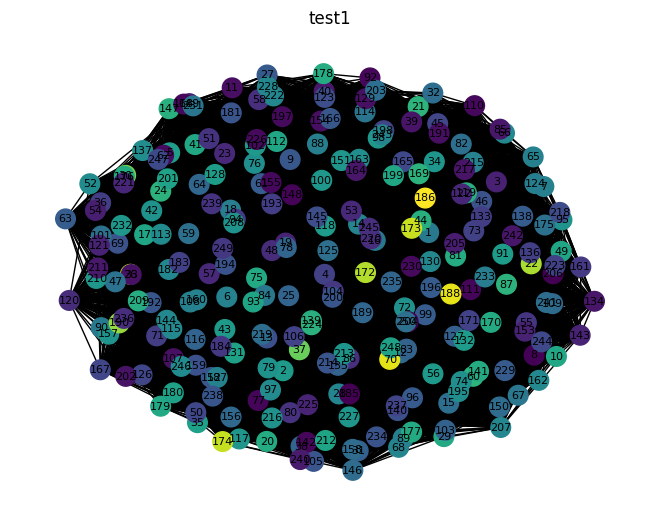

In [18]:
filename = ('../File/test1.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("test1")
    plt.show()
    appendToFile("test1", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("test1", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

In [19]:
filename = ('../File/test2.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("test2")
    plt.show()
    appendToFile("test2", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("test2", 0, 300)
    # print("Minimalno bojenje grafa:", best_solution.colors)
    #print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 33.08589148521423 seconds
Resenje nije nadjeno
Broj korišćenih boja: 89


Execution time: 0.28475403785705566 seconds
Minimalno bojenje grafa: {1: 2, 2: 3, 3: 3, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3}
Broj korišćenih boja: 3


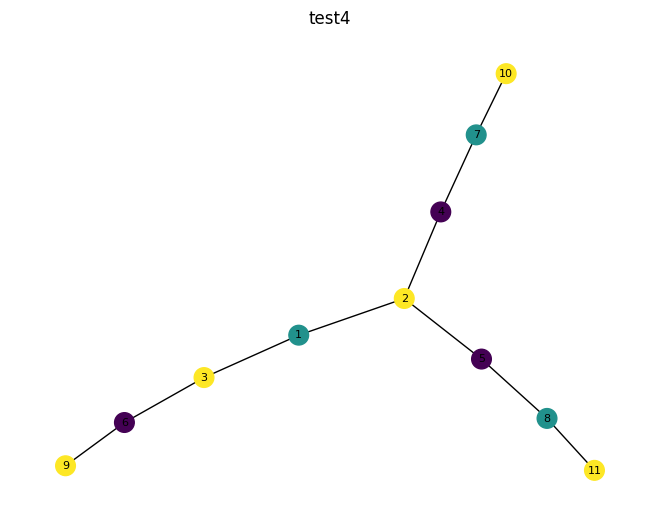

In [20]:
filename = ('../File/test4.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("test4")
    plt.show()
    appendToFile("test4", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("test4", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))